In [1]:
import pandas as pd
import pydot
from IPython.display import SVG

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Load causal algorithms from the py-causal library and Run FCI

In [4]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'fci', testId = 'fisher-z')

alpha: Cutoff for p values (alpha) (min = 0.0) (java.lang.Double) [default:0.01]
depth: Maximum size of conditioning set (unlimited = -1) (java.lang.Integer) [default:-1]
maxPathLength: The maximum length for any discriminating path. -1 if unlimited (min = -1) (java.lang.Integer) [default:-1]
completeRuleSetUsed: Yes if the complete FCI rule set should be used (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:false]


In [5]:
tetrad.run(algoId = 'fci', dfs = df, testId = 'fisher-z', 
           alpha = 0.05, depth = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

#### FCI Continuous' Result's Nodes

In [6]:
tetrad.getNodes()

['TangibilityCondition',
 'AmountDonated',
 'Sympathy',
 'Imaginability',
 'Impact']

#### FCI Continuous' Result's Edges

In [7]:
tetrad.getEdges()

['TangibilityCondition o-o Sympathy',
 'Sympathy o-o Impact',
 'AmountDonated o-o Impact',
 'Imaginability o-o Impact']

#### Plot The Result's Graph

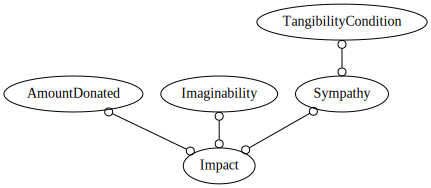

In [8]:
dot = tetrad.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

#### Stop Java VM

In [9]:
pc.stop_vm()